ML Pre-requisite Test

Zainab Kapadia

23110373

### Q1) How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

For the multiplication of two matrices of size (n,k) and (k,m), we require to do some number of multiplications and additions in order to get a resulting matrix of size (n,m).
*    **No. of multiplications**:-
For each element $a_{i,j}$ of the resulting matrix A, we will be performing k multiplications between the corresponding elements of a row of the first matrix (i.e., of the size (n,k)) and a column of the second matrix (which is of the size (k,m)).

Hence, total number of multiplications for all the elements will be k x n x m, (as k multiplications for one element of the reuslting matrix and n x m elements in total).
*   **No. of Additions:-**
For each element $a_{i,j}$ of the resulting matrix A, we need to perform k - 1 additions for adding up k products.

Hence, total number of additions for all the elements will be (k - 1) x n x m




### Q2) Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [22]:
import time
import numpy as np

rows_A, cols_A = 80,120
rows_B, cols_B = 120,60

A = [[i + j for j in range(cols_A)] for i in range(rows_A)]
B = [[i + j for j in range(cols_B)] for i in range(rows_B)]
A_np, B_np = np.array(A), np.array(B)

# List of lists multiplication
def matmul_list(A, B):
  n,k,m = len(A),len(B),len(B[0])
  C = [[0]*m for _ in range(n)]
  for i in range(n):
    for j in range(m):
      s = 0
      for t in range(k):
        s += A[i][t] * B[t][j]
      C[i][j] = s
  return C

t0= time.time()
C_list= matmul_list(A, B)
t1= time.time()- t0

# NumPy multiplication
t0= time.time()
C_np= np.matmul(A_np, B_np)
t2= time.time()- t0

print(f"List of lists time: {t1:.6f} s")
print(f"NumPy time: {t2:.6f} s")

List of lists time: 0.050003 s
NumPy time: 0.000654 s


NumPy is faster because it uses optimized C code and built-in math libraries, which process data in bulk and make better use of the computer's memory, while Python's loops are slower due to extra overhead in each step.

### Q3) Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

Using the similar idea for finding the median of the array would require $\frac{n}{2}$ complete passes of the array and would result in an $O(n^2)$ time complexity in the worst case.This is because, we will remove the smallest element $\frac{n}{2}$ times (or $\frac{n}{2} - 1$ times if $n$ is even) and it would require $O(n)$ time, where n is the length of the array.
Thus, the total time will be  \[T(n) = n + (n - 1) + (n - 2) + ... + (n - $\frac{n}{2}$ + 1).\]

Hence, summing this would result in a quadratic time complexity.

A better method is to sort the array and pick the middle element (or the average of the two middle elements if $n$ is even). Sorting will require $O(nlog n)$ time using efficient algorithms such as mergesort or heapsort, which is asymptotically faster than the $\mathcal{O}(n^2)$ time required by the repeated-passes method.



In [1]:
import numpy as np
from random import randint
import time

def median_repeated_passes(arr):
  arr= arr.tolist()
  n= len(arr)
  if n%2 == 1:
    for _ in range(n//2):
      arr.remove(min(arr))
    return min(arr)
  else:
    for _ in range(n//2 - 1):
      arr.remove(min(arr))
    first= min(arr)
    arr.remove(first)
    sec= min(arr)
    return (first+sec)/2

def median_sorting(arr):
  arr= sorted(arr.tolist())
  n= len(arr)
  mid= n//2
  if n%2 == 1:
    return arr[mid]
  else:
    return (arr[mid-1]+arr[mid])/2

#random array
np.random.seed(0)
arr= np.random.randint(0,100000, size=20000)

# Repeated passes
start= time.time()
med_rp= median_repeated_passes(arr)
print(f"Median by repeated passes: {med_rp}, Time: {time.time() - start:.4f}s")

# Sorting
start= time.time()
med_sort= median_sorting(arr)
print(f"Median by sorting: {med_sort}, Time: {time.time() - start:.4f}s")

# NumPy median
start= time.time()
med_np= np.median(arr)
print(f"Median by NumPy: {med_np}, Time: {time.time() - start:.4f}s")


Median by repeated passes: 49686.5, Time: 5.3394s
Median by sorting: 49686.5, Time: 0.0251s
Median by NumPy: 49686.5, Time: 0.0068s


The repeated-passes method is significantly slower (5.34 s) compared to sorting (0.025 s) and NumPy's optimized median (0.0068 s), confirming that sorting is a much better approach in practice, and NumPy provides the fastest performance due to its underlying C optimizations.

### Q4) What is the gradient of the following function with respect to x and y?
$f($x, y$)$ = $x^{2}$$y$ + $y^{3} \sin(x)$.


Given $f(x, y) = x^{2}y + y^{2}\sin x$, the gradient $\nabla f$ is found by calculating the partial derivatives with respect to $x$ and $y$.

Partial derivative w.r.t. $x$:-

$\frac{\partial}{\partial x}(x^{2}y) = 2xy$,

$\frac{\partial}{\partial x}(y^{2}\sin x) = y^{2}\cos x$

Thus,
$\frac{\partial f}{\partial x} = 2xy + y^{2}\cos x$

Now, Partial derivative w.r.t. $y$:-

$\frac{\partial}{\partial y}(x^{2}y) = x^{2}$

$\frac{\partial}{\partial y}(y^{2}\sin x) = 2y\sin x$

Thus, $\frac{\partial f}{\partial y} = x^{2} + 2y\sin x$

Hence, Gradient:
$\nabla f(x, y) = \big( 2xy + y^{2}\cos x,\; x^{2} + 2y\sin x \big)$


### Q5) Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [4]:
import jax
import jax.numpy as jnp

#function definition
def f(x,y):
  return x**2 * y + y**2 * jnp.sin(x)

#JAX gradient wrt x and y
grad_f= jax.grad(f, argnums=(0,1))

#test values
pts= [(10.0, 2.0), (1.0, 1.0), (4.0, 23.0)]

for x_val, y_val in pts:
  #analytical gradient
  df_dx = 2*x_val*y_val + y_val**2 * jnp.cos(x_val)
  df_dy = x_val**2 + 2*y_val * jnp.sin(x_val)

  #JAX gradient
  g_x,g_y = grad_f(x_val, y_val)

  print(f"(x,y)= ({x_val}, {y_val})")
  print(f"Analytical: ({df_dx}, {df_dy})")
  print(f"JAX: ({g_x}, {g_y})\n")


(x,y)= (10.0, 2.0)
Analytical: (36.643714904785156, 97.82391357421875)
JAX: (36.643714904785156, 97.82391357421875)

(x,y)= (1.0, 1.0)
Analytical: (2.540302276611328, 2.6829419136047363)
JAX: (2.540302276611328, 2.6829419136047363)

(x,y)= (4.0, 23.0)
Analytical: (-161.7774658203125, -18.812915802001953)
JAX: (-161.7774658203125, -18.812915802001953)



The gradients computed using JAX exactly match the analytically derived values for all (x,y) pairs.

### Q6) Use sympy to confirm that you obtain the same gradient analytically.

In [6]:
import sympy as sp

# variables and function
x,y = sp.symbols('x y')
f= x**2 * y + y**2 * sp.sin(x)

# partial derivatives
df_dx= sp.diff(f,x)
df_dy= sp.diff(f,y)

# test points
pts= [(10.0, 2.0), (1.0, 1.0), (4.0, 23.0)]

for xv, yv in pts:
  grad_x= df_dx.subs({x: xv, y: yv})
  grad_y= df_dy.subs({x: xv, y: yv})
  print(f"(x,y)= ({xv}, {yv}) :- SymPy Gradient: ({grad_x}, {grad_y})")

(x,y)= (10.0, 2.0) :- SymPy Gradient: (36.6437138836942, 97.8239155564425)
(x,y)= (1.0, 1.0) :- SymPy Gradient: (2.54030230586814, 2.68294196961579)
(x,y)= (4.0, 23.0) :- SymPy Gradient: (-161.777475436851, -18.8129147841647)


The gradients obtained from SymPy are numerically identical to those computed using JAX and analytically, with the minor differences occuring due to to floating-point precision.

### Q7)Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

1. 2022
  1. Branch 1
    1. Roll Number: 1, Name: N, Marks:
        1. Maths: 100, English: 70 …
  2. Branch 2

2. 2023
  1. Branch 1
  2. Branch 2

3. 2024
  1. Branch 1
  2. Branch 2

4. 2025
  1. Branch 1
  2. Branch 2

In [23]:
import pprint

students_records = {
    2022:{
      'Branch 1':{
        1:{'Name':'A', 'Marks':{'Maths': 100, 'English': 70}},
        2:{'Name':'B', 'Marks':{'Maths': 78, 'English': 80}}
      },
      'Branch 2':{
        3:{'Name':'C', 'Marks': {'Maths': 85, 'English': 90}},
        4:{'Name':'D', 'Marks': {'Maths': 92, 'English': 85}}
      }
    },
    2023: {
      'Branch 1': {
        1: {'Name':'E', 'Marks': {'Maths': 88, 'English': 75}},
        2: {'Name':'F', 'Marks': {'Maths': 80, 'English': 70}}
      },
      'Branch 2': {
        3: {'Name':'G', 'Marks': {'Maths': 78, 'English': 80}},
        4: {'Name':'H', 'Marks': {'Maths': 85, 'English': 88}}
      }
    },
    2024: {
      'Branch 1': {
        1: {'Name':'I', 'Marks': {'Maths': 90, 'English': 85}},
        2: {'Name':'J', 'Marks': {'Maths': 85, 'English': 92}}
      },
      'Branch 2': {
        3: {'Name':'K', 'Marks': {'Maths': 92, 'English': 88}},
        4: {'Name':'L', 'Marks': {'Maths': 88, 'English': 78}}
      }
    },
    2025: {
      'Branch 1': {
        1: {'Name':'M', 'Marks': {'Maths': 95, 'English': 80}},
        2: {'Name':'N', 'Marks': {'Maths': 88, 'English': 75}}
      },
      'Branch 2': {
        3: {'Name':'O', 'Marks': {'Maths': 90, 'English': 85}},
        4: {'Name':'P', 'Marks': {'Maths': 85, 'English': 92}}
      }
    }
}

pprint.pprint(students_records)


{2022: {'Branch 1': {1: {'Marks': {'English': 70, 'Maths': 100}, 'Name': 'A'},
                     2: {'Marks': {'English': 80, 'Maths': 78}, 'Name': 'B'}},
        'Branch 2': {3: {'Marks': {'English': 90, 'Maths': 85}, 'Name': 'C'},
                     4: {'Marks': {'English': 85, 'Maths': 92}, 'Name': 'D'}}},
 2023: {'Branch 1': {1: {'Marks': {'English': 75, 'Maths': 88}, 'Name': 'E'},
                     2: {'Marks': {'English': 70, 'Maths': 80}, 'Name': 'F'}},
        'Branch 2': {3: {'Marks': {'English': 80, 'Maths': 78}, 'Name': 'G'},
                     4: {'Marks': {'English': 88, 'Maths': 85}, 'Name': 'H'}}},
 2024: {'Branch 1': {1: {'Marks': {'English': 85, 'Maths': 90}, 'Name': 'I'},
                     2: {'Marks': {'English': 92, 'Maths': 85}, 'Name': 'J'}},
        'Branch 2': {3: {'Marks': {'English': 88, 'Maths': 92}, 'Name': 'K'},
                     4: {'Marks': {'English': 78, 'Maths': 88}, 'Name': 'L'}}},
 2025: {'Branch 1': {1: {'Marks': {'English': 80, 'Mat

### Q8) Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [24]:
class Student:
  def __init__(self, roll_number, name, marks):
    self.roll_number = roll_number
    self.name = name
    self.marks = marks

  def __repr__(self):
    return f"Student(Roll Number: {self.roll_number}, Name: {self.name}, Marks: {self.marks})"

class Branch:
  def __init__(self, branch_name):
    self.branch_name = branch_name
    self.students = []

  def add_student(self, student):
    self.students.append(student)

  def __repr__(self):
    return f"Branch(Name: {self.branch_name}, Students: {self.students})"

class Year:
  def __init__(self, year):
    self.year = year
    self.branches = []

  def add_branch(self, branch):
    self.branches.append(branch)

  def __repr__(self):
    return f"Year: {self.year}, Branches: {self.branches}"

database = []
for year in range(2022, 2026):
  database.append(Year(year))

# Adding branches and students
database[0].add_branch(Branch("Branch 1"))
database[0].branches[0].add_student(Student(1, "A", {"English": 70, "Maths": 100}))
database[0].branches[0].add_student(Student(2, "B", {"English": 80, "Maths": 78}))

database[0].add_branch(Branch("Branch 2"))
database[0].branches[1].add_student(Student(3, "C", {"English": 90, "Maths": 85}))
database[0].branches[1].add_student(Student(4, "D", {"English": 85, "Maths": 92}))

database[1].add_branch(Branch("Branch 1"))
database[1].branches[0].add_student(Student(1, "E", {"English": 75, "Maths": 88}))
database[1].branches[0].add_student(Student(2, "F", {"English": 70, "Maths": 80}))

database[1].add_branch(Branch("Branch 2"))
database[1].branches[1].add_student(Student(3, "G", {"English": 80, "Maths": 78}))
database[1].branches[1].add_student(Student(4, "H", {"English": 88, "Maths": 85}))

database[2].add_branch(Branch("Branch 1"))
database[2].branches[0].add_student(Student(1, "I", {"English": 85, "Maths": 90}))
database[2].branches[0].add_student(Student(2, "J", {"English": 92, "Maths": 85}))

database[2].add_branch(Branch("Branch 2"))
database[2].branches[1].add_student(Student(3, "K", {"English": 88, "Maths": 92}))
database[2].branches[1].add_student(Student(4, "L", {"English": 78, "Maths": 88}))

database[3].add_branch(Branch("Branch 1"))
database[3].branches[0].add_student(Student(1, "M", {"English": 80, "Maths": 95}))
database[3].branches[0].add_student(Student(2, "N", {"English": 75, "Maths": 88}))

database[3].add_branch(Branch("Branch 2"))
database[3].branches[1].add_student(Student(3, "O", {"English": 85, "Maths": 90}))
database[3].branches[1].add_student(Student(4, "P", {"English": 92, "Maths": 85}))

for year in database:
  print(year)

Year: 2022, Branches: [Branch(Name: Branch 1, Students: [Student(Roll Number: 1, Name: A, Marks: {'English': 70, 'Maths': 100}), Student(Roll Number: 2, Name: B, Marks: {'English': 80, 'Maths': 78})]), Branch(Name: Branch 2, Students: [Student(Roll Number: 3, Name: C, Marks: {'English': 90, 'Maths': 85}), Student(Roll Number: 4, Name: D, Marks: {'English': 85, 'Maths': 92})])]
Year: 2023, Branches: [Branch(Name: Branch 1, Students: [Student(Roll Number: 1, Name: E, Marks: {'English': 75, 'Maths': 88}), Student(Roll Number: 2, Name: F, Marks: {'English': 70, 'Maths': 80})]), Branch(Name: Branch 2, Students: [Student(Roll Number: 3, Name: G, Marks: {'English': 80, 'Maths': 78}), Student(Roll Number: 4, Name: H, Marks: {'English': 88, 'Maths': 85})])]
Year: 2024, Branches: [Branch(Name: Branch 1, Students: [Student(Roll Number: 1, Name: I, Marks: {'English': 85, 'Maths': 90}), Student(Roll Number: 2, Name: J, Marks: {'English': 92, 'Maths': 85})]), Branch(Name: Branch 2, Students: [Studen

### Q9) Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

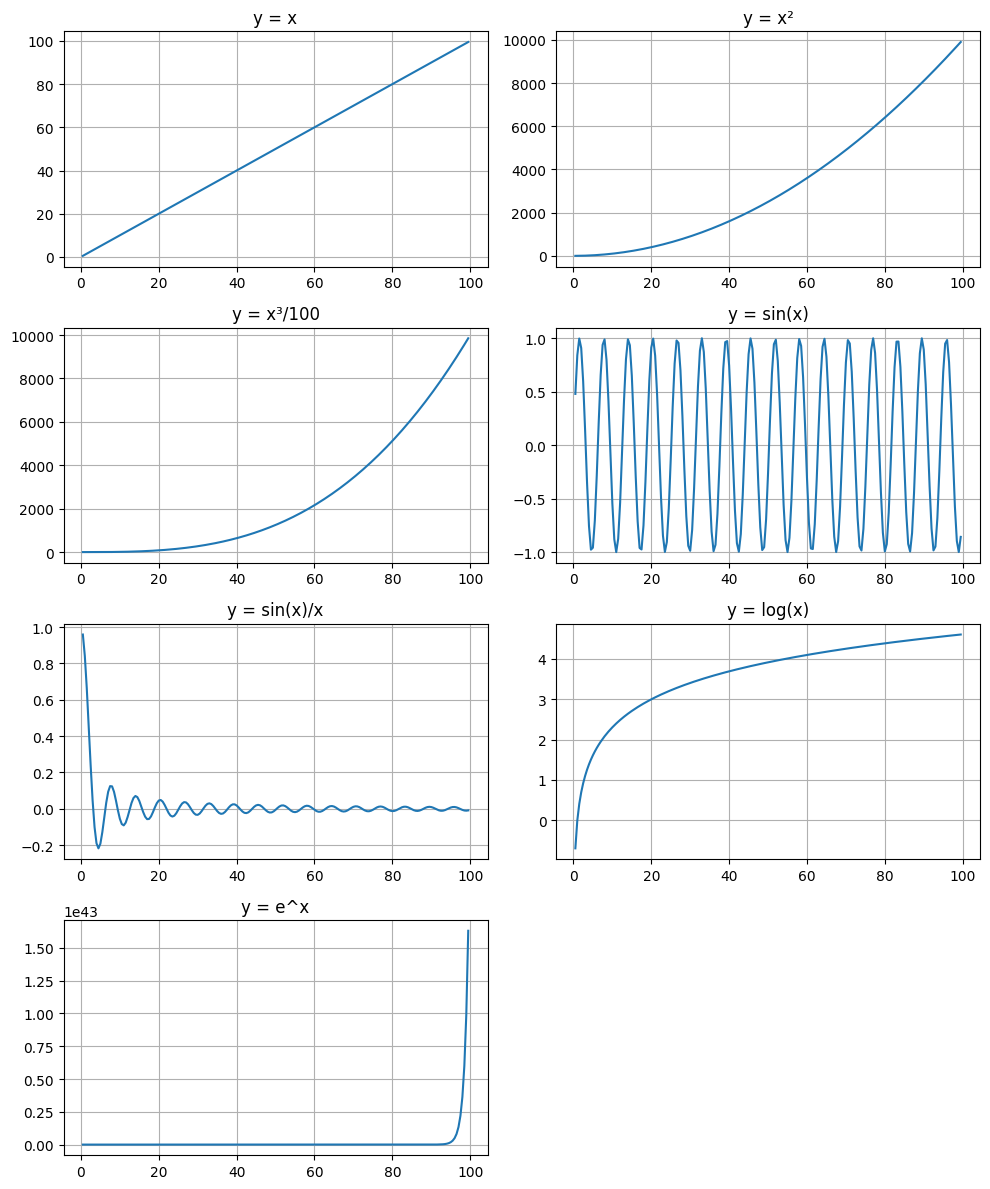

In [10]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.5, 100.0, 0.5)

functions = {
    "y = x": x,
    "y = x²": x**2,
    "y = x³/100": x**3 / 100,
    "y = sin(x)": np.sin(x),
    "y = sin(x)/x": np.sin(x) / x,
    "y = log(x)": np.log(x),
    "y = e^x": np.exp(x)
}

plt.figure(figsize=(10, 12))

for i, (label, y) in enumerate(functions.items(), 1):
    plt.subplot(4, 2, i)
    plt.plot(x, y)
    plt.title(label)
    plt.grid(True)

plt.tight_layout()
plt.show()

### Q10) Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [12]:
import numpy as np
import pandas as pd

matrix= np.random.uniform(1, 2, size=(20, 5))
df= pd.DataFrame(matrix, columns=['a', 'b', 'c', 'd', 'e'])
df

,a,b,c,d,e
0,1.409118,1.030864,1.932290,1.292632,1.728528
1,1.342407,1.841615,1.652062,1.293017,1.136542
2,1.163363,1.777696,1.101300,1.145781,1.591293
3,1.126506,1.053408,1.194029,1.291617,1.401386
4,1.694494,1.758009,1.627166,1.520827,1.064544
5,1.455552,1.106184,1.831664,1.292560,1.403675
6,1.058316,1.422171,1.644867,1.496906,1.823266
7,1.397536,1.949288,1.827952,1.787130,1.153422
8,1.240457,1.349666,1.180530,1.074733,1.025845
9,1.412538,1.037836,1.174914,1.921226,1.498545


In [14]:
highest_stddev_col= df.std().idxmax()
lowest_mean_row= df.mean(axis=1).idxmin()

highest_stddev_col, lowest_mean_row

('b', 8)

### Q11) Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [15]:
df['f']= df.sum(axis=1)
df['g'] = df['f'].apply(lambda x: 'LT8' if x < 8 else 'GT8')

df

,a,b,c,d,e,f,g
0,1.409118,1.030864,1.932290,1.292632,1.728528,7.393432,LT8
1,1.342407,1.841615,1.652062,1.293017,1.136542,7.265643,LT8
2,1.163363,1.777696,1.101300,1.145781,1.591293,6.779433,LT8
3,1.126506,1.053408,1.194029,1.291617,1.401386,6.066946,LT8
4,1.694494,1.758009,1.627166,1.520827,1.064544,7.665039,LT8
5,1.455552,1.106184,1.831664,1.292560,1.403675,7.089635,LT8
6,1.058316,1.422171,1.644867,1.496906,1.823266,7.445526,LT8
7,1.397536,1.949288,1.827952,1.787130,1.153422,8.115328,GT8
8,1.240457,1.349666,1.180530,1.074733,1.025845,5.871231,LT8
9,1.412538,1.037836,1.174914,1.921226,1.498545,7.045060,LT8


In [16]:
lt8_count = df[df['g'] == 'LT8'].shape[0]
std_devf_lt8 = df[df['g'] == 'LT8']['f'].std()
std_devf_gt8 = df[df['g'] == 'GT8']['f'].std()

lt8_count, std_devf_lt8, std_devf_gt8

(17, 0.5766111229386607, 0.18722464840035846)

### Q12) Write a small piece of code to explain broadcasting in numpy.

Broadcasting is a feature in NumPy that lets us perform arithmetic operations on arrays of different shapes by automatically expanding one or both arrays so their shapes are compatible.

Ex:- Multiplying a scalar with an array
If you multiply a scalar by a NumPy array, NumPy broadcasts the scalar across the array. This means that the scalar is automatically multiplied with every element in the array:

Array: [4, 5, 6]

Scalar: 2

Result: [8, 10, 12] — each element is doubled.

In [18]:
import numpy as np

# Example – Multiplying a scalar with an array
arr1 = np.array([4, 5, 6])
scalar = 2
result1 = arr1 * scalar
print("Example:")
print("Array:", arr1)
print("Scalar:", scalar)
print("Result:", result1, "\n")

Example:
Array: [4 5 6]
Scalar: 2
Result: [ 8 10 12] 



### Q13) Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [20]:
import numpy as np

def custom_argmin(arr):
  min_idx = 0
  for i in range(1, len(arr)):
    if arr[i] < arr[min_idx]:
      min_idx = i
  return min_idx

# Example
a = np.array([10, -1, 22, 0, 5, 4, 3])
print("Custom argmin index:", custom_argmin(a))
print("NumPy argmin index :", np.argmin(a))

Custom argmin index: 1
NumPy argmin index : 1
